# Data 620 Assignment: Graph Visualization

Jithendra Seneviratne, Sheryl Piechocki 

June 7, 2020

### Youtube video
[Video link](https://youtu.be/iNLIJAGLu2A)

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

The data used in this graph visualization assignment is the power grid of the western United States.  In this data a node is a transformer, generator, or substation and the edges are the power transmission lines.  It is an undirected network.  Power grid network analysis is important because failures at one node or interruptions in one edge, can have wide reaching effects causing power outages for thousands or millions of customers.  In this assignment we take a look at some basic information about this power grid network.

The data is available here: http://networkdata.ics.uci.edu/data/power/
D. J. Watts and S. H. Strogatz, "Collective dynamics of 'small-world' networks", *Nature* 393, 440-442 (1998).

In [2]:
G = nx.read_gml('power.gml', label='id')

#### Graph Nodes

Get the number of nodes in the graph.  The network has 4,941 nodes.  These are transformers, generators, or substations.

In [3]:
G.number_of_nodes()

4941

#### Graph Edges

Get the number of edges in the graph.  There are 6,594 edges in the network.

In [4]:
G.number_of_edges()

6594

#### Graph Connectedness

Check if the graph is connected.  The power network is connected.  This means every node can be reached via some path from every other node.

In [5]:
nx.is_connected(G)

True

#### Graph Diameter

Get the diameter of the graph.  The diameter of the graph is 46.  The maximum shortest path between any two nodes is 46. 

In [6]:
diam = nx.diameter(G)
diam

46

#### Graph Center

Get the center of the graph.  Node 1125 is the center of the graph, where the radius is equal to the eccentricity.

In [7]:
cent = nx.center(G)
cent

[1125]

#### Shortest Paths

We can find the shortest paths to nodes from the center. Among all shortest paths from node 1125 to others, the distance between node 1125 and node 699 is the greatest.


In [8]:
p = nx.shortest_path(G, source=1125) # target not specified
end = list(p)[-1]
p[end]

[1125,
 1476,
 1308,
 2594,
 2605,
 2606,
 2528,
 2543,
 4219,
 4164,
 4207,
 4206,
 4199,
 3785,
 3781,
 726,
 652,
 584,
 672,
 671,
 637,
 728,
 698,
 699]

#### Distribution of Lengths of Shortest Paths

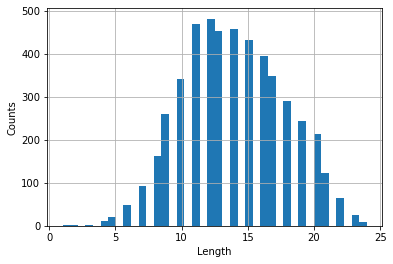

In [25]:
pd.Series([len(v) for k, v in p.items()]).hist(bins=40);
plt.xlabel("Length");
plt.ylabel("Counts");

#### Max Degrees (Visualize Top Five)

Get the node with the maximum degrees.  Node 2553 has the most degrees.  It has 19 degrees, meaning it has 19 neighbors.

In [23]:
deg = nx.degree(G)
max_deg = sorted(deg, key=lambda x: x[1], reverse=True)[:5]
max_deg

[(2553, 19), (4458, 18), (831, 14), (3468, 14), (4345, 14)]

#### Degree Centrality (Visualize Top Five)

Get the node with the maximum degree centrality.  Node 2553 has the maximum degree centrality of 0.003846.  Degree centrality of a node is the number of degrees of the node divided by one less than the total number of nodes. In a power grid this node is critical, because if this transformer breaks down, then it can have an impact on many other nodes.

In [13]:
deg_cent = nx.degree_centrality(G)
max_cent = sorted(deg_cent.items(), key=lambda x: x[1], reverse=True)[:5]
max_cent

[(2553, 0.003846153846153846),
 (4458, 0.0036437246963562753),
 (831, 0.0028340080971659917),
 (3468, 0.0028340080971659917),
 (4345, 0.0028340080971659917)]

#### Closeness Centrality (Visualize Top Five)

Closeness centrality is based on the shortest paths across all nodes. If the nodes with greatest closeness centrality are loaded correctly, we can minimize cost.  Node 1308 has the maximum closeness centrality.

In [14]:
close_cent = nx.closeness_centrality(G)
max_close_cent = sorted(close_cent.items(), key=lambda x: x[1], reverse=True)[:5]
max_close_cent

[(1308, 0.08182330142114155),
 (2594, 0.0809437981320662),
 (2605, 0.08035786905246035),
 (1131, 0.07987194619153098),
 (2606, 0.0796260477111541)]

#### Betweenness Centrality (Visualize Top Five)

Betweenness centrality looks at the number of times a node acts as a bridge along the shortest path across two other nodes. This is in many ways related to closeness centrality.  Node 4164 has the maximum betweenness centrality.

In [15]:
bet_cent = nx.betweenness_centrality(G)
max_bet_cent = sorted(bet_cent.items(), key=lambda x: x[1], reverse=True)[:5]
max_bet_cent

[(4164, 0.28841562147939626),
 (2543, 0.281698123316245),
 (1243, 0.2796951897344535),
 (4219, 0.27764988777849753),
 (2528, 0.2673044750046778)]

#### Plotting Highest Degree Node with Network

Here is node 2553 and its immediate neighbors (plotted using Gephi).

![Note with most degree centrality](2553.png)

#### Summary Graph

Here is a summary graph with all nodes. Distances have been modified using a Force Atlas layout. This layout is a type of force directed layout. High degree nodes are accentuated.

![Nodes with most connections](gephi_all_nodes.png)